In [1]:
from sklearn.cluster import DBSCAN
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump


# Data1

In [2]:
data1 = pd.read_csv('../Data/DataLaba6/data1.csv')
x1 = (data1.drop('class', axis=1)).to_numpy()
y1 = data1['class'].to_numpy()


AttributeError: 'Axes' object has no attribute 'plot_trisurf'

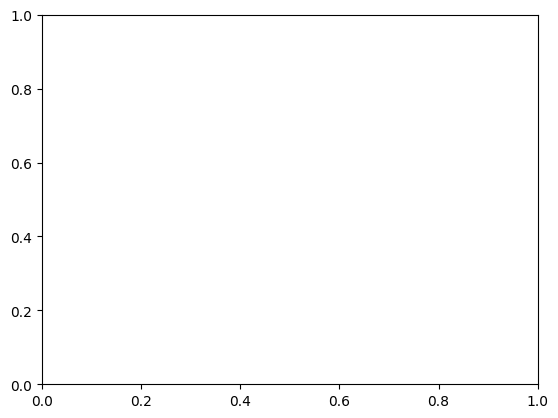

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib.ticker import PercentFormatter

fig = plt.figure()
ax = fig.gca()


# Z = []
eps = np.arange(.1, max(x1.std(axis=0)))
min_samples = np.arange(2, eps.shape[0]+2)
# for x in eps:
#     for y in min_samples:
#         print(x, y)
#         k = DBSCAN(eps=x, min_samples=y).fit_predict(x1)
#         print(k.shape, np.unique(k), x1.shape)
#         Z.append(silhouette_score(x1, k) if np.unique(k).shape[0] > 1 else -10)

X, Y = np.meshgrid(eps, min_samples)
Z = []
ax.plot_trisurf(eps, min_samples, np.array(Z),
                       linewidth=0, antialiased=True)


# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# ax.view_init(30, 210)
plt.show()


([<matplotlib.axis.XTick at 0x261e9798fd0>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10')])

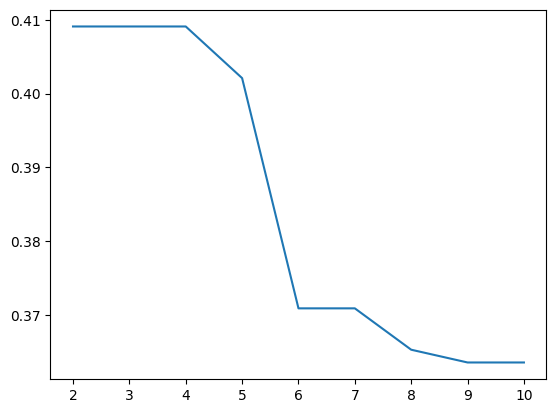

In [4]:
ss = []
for i in range(2, 11):
    ss.append(silhouette_score(x1, DBSCAN(min_samples=i).fit_predict(x1)))
plt.plot(ss)
plt.xticks(range(0, 9), range(2, 11))


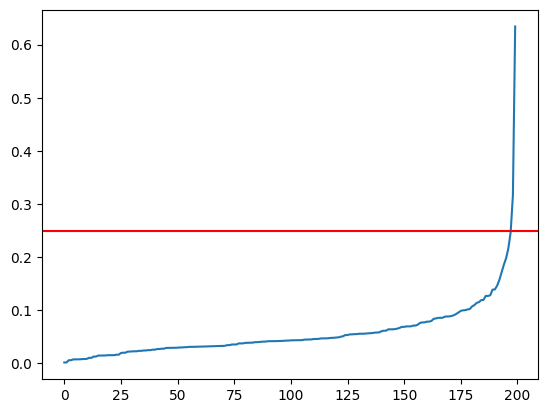

In [24]:
nbrs = NearestNeighbors(n_neighbors=2).fit(x1)
distances, indices = nbrs.kneighbors(x1)
plt.plot(np.sort(np.mean(distances, axis=1)))
plt.axhline(0.25, color='red', linestyle='-')


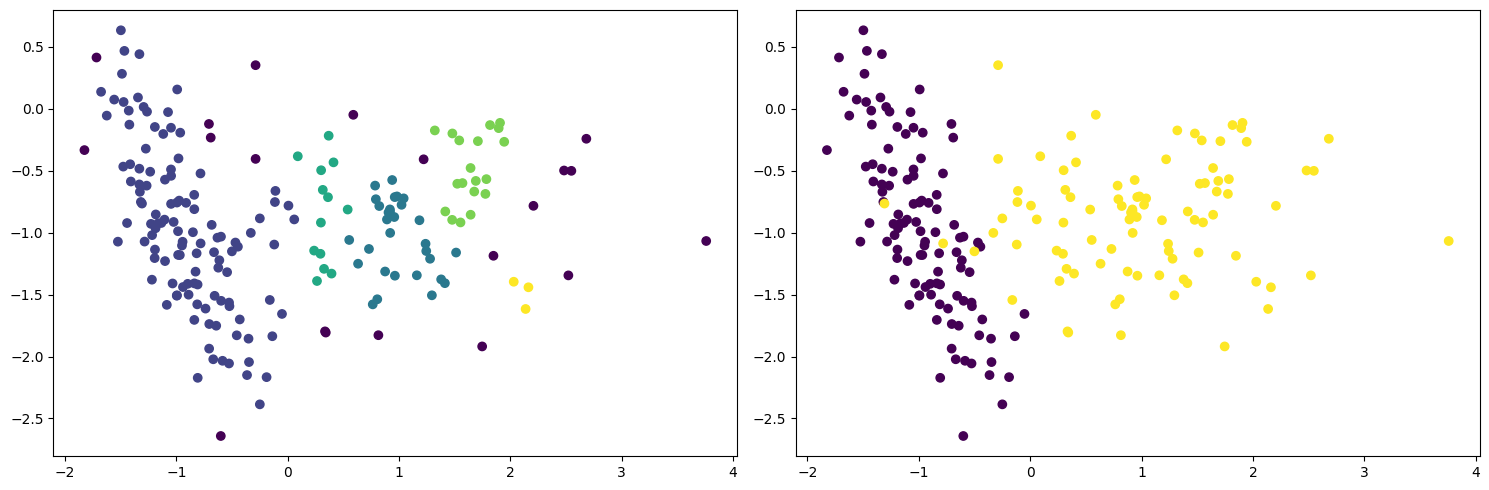

In [23]:
dbscan1 = DBSCAN(eps=0.25, min_samples=3).fit(x1)
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(x1[:, 0], x1[:, 1], c=dbscan1.labels_)
ax = fig.add_subplot(gs[0, 1])
ax.scatter(x1[:,0], x1[:,1], c=y1)

# Data2

In [26]:
data2 = pd.read_csv('../Data/DataLaba6/data2.csv')
x2 = (data2.drop('class', axis=1)).to_numpy()
y2 = data2['class'].to_numpy()


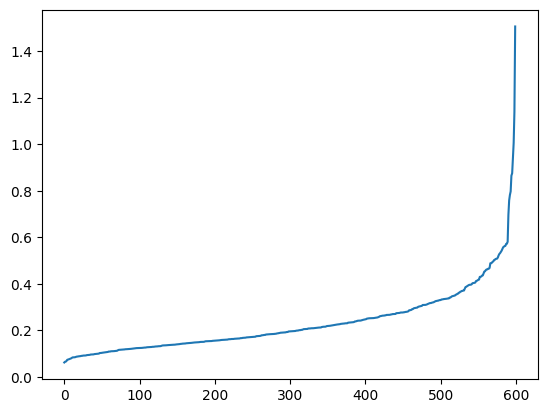

In [27]:
nbrs = NearestNeighbors(n_neighbors=4).fit(x2)
distances, indices = nbrs.kneighbors(x2)
plt.plot(np.sort(np.mean(distances, axis=1)))


In [6]:
dbscan2 = DBSCAN(eps=0.4, min_samples=4).fit(x2)


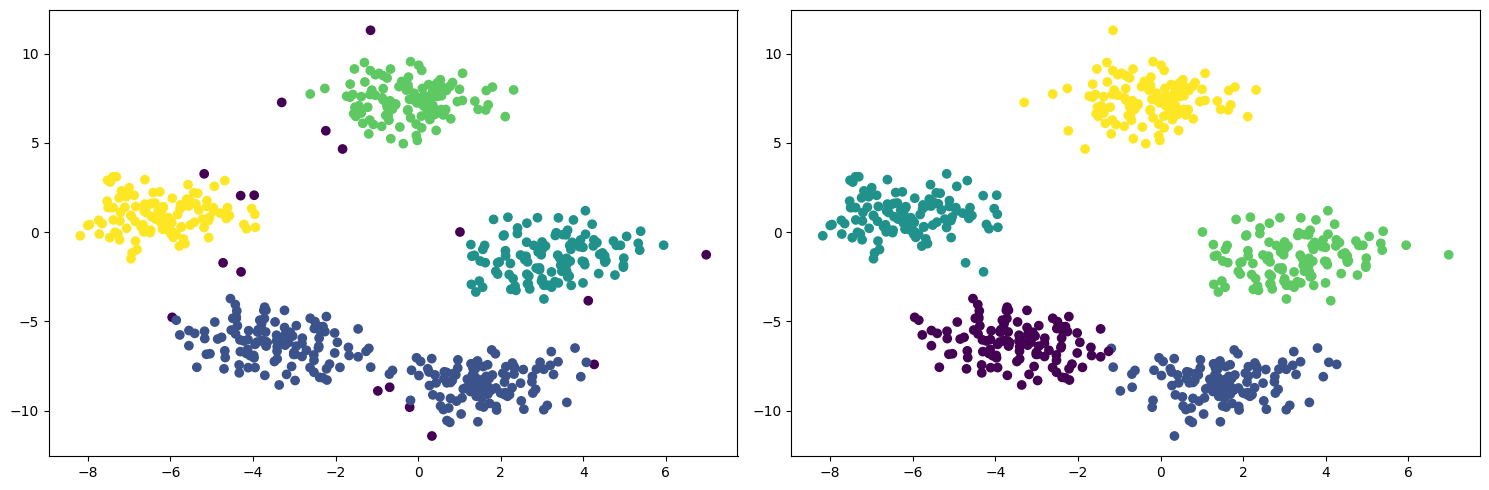

In [28]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(x2[:,0], x2[:,1], c=dbscan2.labels_)
ax = fig.add_subplot(gs[0, 1])
ax.scatter(x2[:,0], x2[:,1], c=y2)

# Data 3

In [29]:
data3 = pd.read_csv('../Data/DataLaba6/data3.csv')
x3 = (data3.drop('class', axis=1)).to_numpy()
y3 = data3['class'].to_numpy()


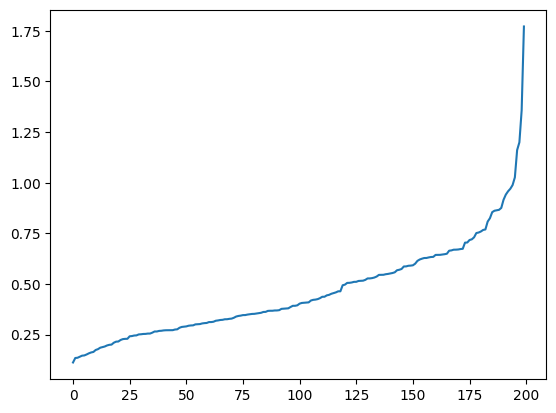

In [30]:
nbrs = NearestNeighbors(n_neighbors=4).fit(x3)
distances, indices = nbrs.kneighbors(x3)
plt.plot(np.sort(np.mean(distances, axis=1)))


In [33]:
dbscan3 = DBSCAN(eps=0.75, min_samples=3).fit(x3)


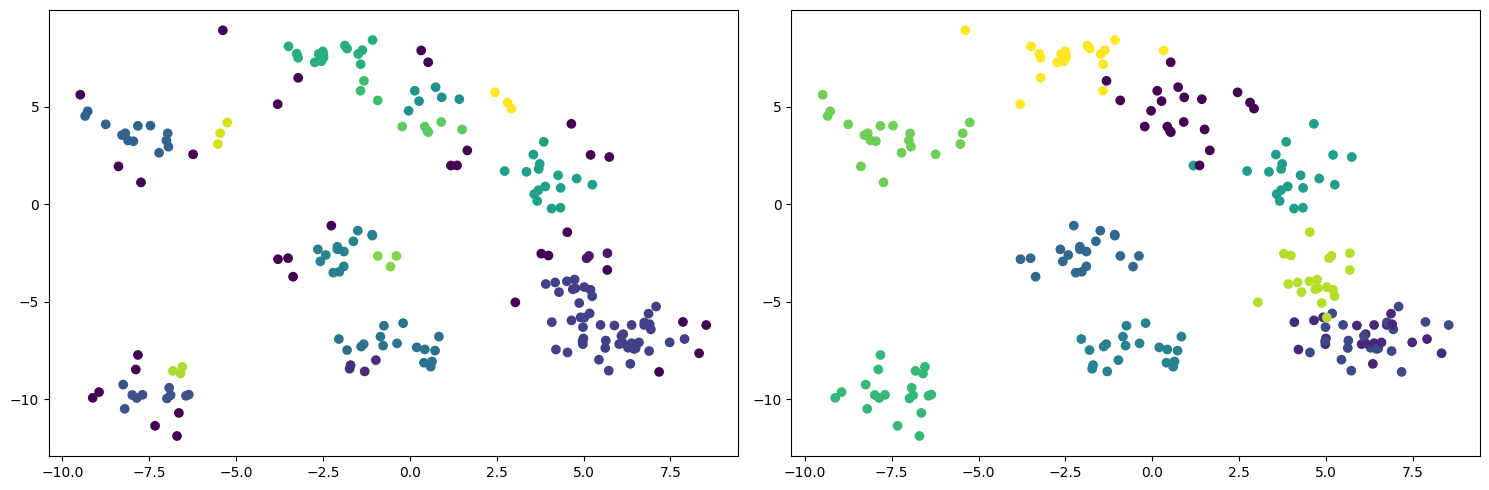

In [34]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(x3[:,0], x3[:,1], c=dbscan3.labels_)
ax = fig.add_subplot(gs[0, 1])
ax.scatter(x3[:,0], x3[:,1], c=y3)